# **20 hands-on Pandas exercises** on **JSON, XML, and HTML/web scraping**

### **What the Dataset Is About**

* **Context:**
  This is a **quality control dataset** from a **Coordinate Measuring Machine (CMM)** used to evaluate **geometric tolerances** of manufactured components like:

  * Cylinder
  * Shaft
  * Cover Plate
  * Disc
  * Bracket
  * Bushing

* **Machines Used:**

  * CMM A
  * CMM B
  * CMM C
    Each machine operates on two daily shifts: `Shift 1` and `Shift 2`.



### **Fields/Columns in the Dataset**

| Field                     | Description                                                  |
| ------------------------- | ------------------------------------------------------------ |
| `Date`                    | Inspection date                                              |
| `Shift`                   | Which shift the inspection occurred (`Shift 1` or `Shift 2`) |
| `Machine ID`              | ID of the CMM used (`CMM A`, `B`, or `C`)                    |
| `Component Type`          | The type of part measured (e.g., Shaft, Cylinder, Disc)      |
| `Batch ID`                | Unique batch identifier                                      |
| `Flatness (µm)`           | Deviation in flatness in micrometers                         |
| `Circularity (µm)`        | Out-of-roundness measure                                     |
| `Cylindricity (µm)`       | Deviation from a perfect cylinder                            |
| `Straightness (µm)`       | Line deviation along an axis                                 |
| `Perpendicularity (µm)`   | Angular deviation from 90 degrees                            |
| `Parallelism (µm)`        | Measure of how parallel surfaces are                         |
| `Position Tolerance (µm)` | Combined geometric tolerance for a feature                   |
| `Pass/Fail`               | Result of the quality inspection                             |



### **Formats**

* **`JSON` Version:**

  * Well-structured.
  * Easy to load with `pd.read_json()`.
  * Each record is a dictionary, making it ideal for API-style consumption or NoSQL-like access.

* **`XML` Version:**

  * Has `<Measurement>` nodes under a root `<Measurements>` tag.
  * Structured for hierarchical querying, useful in web systems or legacy manufacturing databases.



### **Why This Dataset Is Useful**

This dataset simulates a **real-world scenario in precision manufacturing**, making it excellent for:

* Practicing **data wrangling** with JSON and XML.
* Performing **tolerance analysis** and **failure investigations**.
* Analyzing **machine performance**, **process capability**, and **shift-based trends**.
* Learning to **visualize engineering metrics** and align them to industry tolerances.



In [447]:
import json
import sys
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from lxml import html, objectify
from io import StringIO

### ### Section A: JSON Data Handling

### **Exercise 1: Load JSON Data**

**Problem:** Load the JSON dataset and display the first 5 rows.

**Purpose:** To practice importing JSON data using `pd.read_json()` and ensure structure is understood.

In [448]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')  # Converts directly to DataFrame

In [449]:
df.head()

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail
0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.00,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.30,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail
3,2025-01-01,Shift 2,CMM A,Shaft,CMM9522,2.56,4.17,21.14,6.36,9.22,12.48,20.86,Pass
4,2025-01-01,Shift 2,CMM A,Shaft,CMM7033,4.10,3.86,16.50,1.77,21.66,4.24,12.04,Pass


### **Exercise 2: Normalize Nested JSON (if applicable)**

**Problem:** Flatten the JSON structure (if nested) using `json_normalize`.

**Purpose:** Practice dealing with nested JSON, even if this dataset is flat.


In [450]:
# to use the json_normalize, nested_example.json file is loaded (the cmm file is already flat --> each record is a dictionary with simple key-value pairs)
with open('JSON/nested_example.json') as f:
    nested_data = json.load(f)

In [451]:
df = pd.json_normalize(nested_data)

In [452]:
df.head()

,Date,Shift,Result,Machine.ID,Machine.Type,Component.Type,Component.BatchID,Measurements.Flatness,Measurements.Circularity,Measurements.Cylindricity,Measurements.Straightness,Measurements.Perpendicularity,Measurements.Parallelism,Measurements.PositionTolerance
0,2025-01-01,Shift 1,Fail,CMM B,Bridge,Cylinder,CMM6728,10.0,11.35,3.05,7.35,20.43,14.25,28.11
1,2025-01-01,Shift 1,Fail,CMM A,Bridge,Cylinder,CMM8120,8.3,14.07,7.94,6.76,8.86,13.19,24.35


### **Exercise 3: Check and Convert Date**

**Problem:** Convert the 'Date' column to a `datetime` object.

**Purpose:** Ensures you can work with time-series operations and filtering.

In [453]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')

In [454]:
df['Date'].dtype

dtype('<M8[ns]')

In [455]:
df['Date'] = pd.to_datetime(df['Date'])

In [456]:
df['Date'].dtype

dtype('<M8[ns]')

In [457]:
df['Date'].iloc[0]

Timestamp('2025-01-01 00:00:00')

In [458]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [459]:
# to confirm time-series functionality
df['Year'] = df['Date'].dt.year

In [460]:
df['Month'] = df['Date'].dt.month

In [461]:
df['Weekday'] = df['Date'].dt.day_name()

In [462]:
df[[ 'Date', 'Year', 'Month', 'Weekday']].head()

,Date,Year,Month,Weekday
0,2025-01-01,2025,1,Wednesday
1,2025-01-01,2025,1,Wednesday
2,2025-01-01,2025,1,Wednesday
3,2025-01-01,2025,1,Wednesday
4,2025-01-01,2025,1,Wednesday


## 1. **Time-Based Filtering**

This means **selecting rows** from your dataset **based on date or time conditions**.


**Purpose:** Helps isolate data for specific periods (daily, monthly, quarterly analysis).




In [463]:
# Entries from January 2025
df[df['Date'].dt.month == 1].head()

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail,Year,Month,Weekday
0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.00,11.35,3.05,7.35,20.43,14.25,28.11,Fail,2025,1,Wednesday
1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.30,14.07,7.94,6.76,8.86,13.19,24.35,Fail,2025,1,Wednesday
2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail,2025,1,Wednesday
3,2025-01-01,Shift 2,CMM A,Shaft,CMM9522,2.56,4.17,21.14,6.36,9.22,12.48,20.86,Pass,2025,1,Wednesday
4,2025-01-01,Shift 2,CMM A,Shaft,CMM7033,4.10,3.86,16.50,1.77,21.66,4.24,12.04,Pass,2025,1,Wednesday


In [464]:
# Entries after MArch 1 , 2025
df[df['Date'] > '2025-03-01'].head()

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail,Year,Month,Weekday
360,2025-03-02,Shift 1,CMM A,Disc,CMM5895,5.63,7.32,18.23,4.02,13.90,9.30,19.70,Fail,2025,3,Sunday
361,2025-03-02,Shift 1,CMM A,Cylinder,CMM8927,2.48,14.22,18.33,9.87,13.34,14.03,17.21,Fail,2025,3,Sunday
362,2025-03-02,Shift 1,CMM A,Cylinder,CMM5737,3.80,9.22,24.19,2.46,7.32,12.98,24.92,Fail,2025,3,Sunday
363,2025-03-02,Shift 2,CMM B,Bracket,CMM1030,14.52,10.76,3.34,8.03,5.45,2.16,29.06,Fail,2025,3,Sunday
364,2025-03-02,Shift 2,CMM A,Bushing,CMM1851,10.64,14.89,20.85,7.04,23.85,7.36,13.68,Fail,2025,3,Sunday


In [465]:
# Entries between two dates
df[(df['Date'] >= '2025-05-01') & (df['Date'] <= '2025-05-31')].head()

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail,Year,Month,Weekday
720,2025-05-01,Shift 1,CMM B,Bracket,CMM8088,8.52,14.60,1.55,3.65,12.01,7.10,10.37,Fail,2025,5,Thursday
721,2025-05-01,Shift 1,CMM C,Cover Plate,CMM6332,19.95,14.76,24.21,4.46,10.08,7.35,6.16,Fail,2025,5,Thursday
722,2025-05-01,Shift 1,CMM A,Cover Plate,CMM3073,14.25,2.65,17.58,6.84,15.86,4.02,22.29,Fail,2025,5,Thursday
723,2025-05-01,Shift 2,CMM C,Bushing,CMM1161,15.99,3.15,22.17,5.49,18.63,7.95,19.28,Fail,2025,5,Thursday
724,2025-05-01,Shift 2,CMM B,Cover Plate,CMM2532,5.04,5.88,10.23,7.41,21.51,9.01,13.01,Pass,2025,5,Thursday


## 2. **Resampling**

Resampling means **changing the frequency of your time series data**, typically using `.resample()` on a datetime index.

> Think of it like: “Summarize this dataset every day, week, or month.”

### Common Frequency Codes

| Code  | Meaning                   |
| ----- | ------------------------- |
| `'D'` | Daily                     |
| `'W'` | Weekly                    |
| `'M'` | Month-end                 |
| `'Q'` | Quarterly                 |
| `'Y'` | Year-end                  |
| `'H'` | Hourly (if time included) |


## Why Use These?

* Track **quality trends over time**
* Find **seasonal patterns or anomalies**
* Aggregate or downsample high-frequency data (like sensor logs)


In [466]:
# first set Date column as index
df.set_index('Date', inplace=True)

In [467]:
# Daily count of inspections
df.resample('D').size()

Date
2025-01-01    6
2025-01-02    6
2025-01-03    6
2025-01-04    6
2025-01-05    6
             ..
2025-12-27    6
2025-12-28    6
2025-12-29    6
2025-12-30    6
2025-12-31    6
Freq: D, Length: 365, dtype: int64

In [468]:
# Weekly average of flatness
df['Flatness (μm)'].resample('W').mean()

Date
2025-01-05    10.626333
2025-01-12    10.611429
2025-01-19    12.054762
2025-01-26    11.768333
2025-02-02    11.687857
2025-02-09    11.234524
2025-02-16    11.780476
2025-02-23    12.740476
2025-03-02    11.527143
2025-03-09    10.097381
2025-03-16    11.002381
2025-03-23    12.357857
2025-03-30    12.551905
2025-04-06    11.270476
2025-04-13     9.172143
2025-04-20    13.201429
2025-04-27    10.102381
2025-05-04    12.630238
2025-05-11    11.964524
2025-05-18    10.548810
2025-05-25    12.342143
2025-06-01    10.861667
2025-06-08     9.997619
2025-06-15    11.975714
2025-06-22    12.047619
2025-06-29    11.047857
2025-07-06    11.912381
2025-07-13    11.970952
2025-07-20    11.707381
2025-07-27    11.279762
2025-08-03    12.158571
2025-08-10    10.069524
2025-08-17    10.519524
2025-08-24    12.054762
2025-08-31    11.082619
2025-09-07    11.381667
2025-09-14    11.311429
2025-09-21    10.297381
2025-09-28    11.199524
2025-10-05    11.250238
2025-10-12    12.356667
2025-10-19 

In [469]:
# Monthly pass/fail counts
df.resample('ME')['Pass/Fail'].value_counts().unstack()

Pass/Fail,Fail,Pass
Date,,
2025-01-31,87,99
2025-02-28,77,91
2025-03-31,100,86
2025-04-30,100,80
2025-05-31,90,96
2025-06-30,98,82
2025-07-31,96,90
2025-08-31,97,89
2025-09-30,92,88


### **Exercise 4: Summarize by Component**

**Problem:** Show average flatness, circularity, and cylindricity per `Component Type`.

**Purpose:** Aggregation and group-based insights.


In [470]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')

In [471]:
df.head(3)

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail
0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.00,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.30,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail


In [472]:
df.groupby('Component Type')[['Flatness (μm)', 'Circularity (μm)', 'Cylindricity (μm)']].mean()

,Flatness (μm),Circularity (μm),Cylindricity (μm)
Component Type,,,
Bracket,13.545789,9.839040,12.165511
Bushing,11.940994,9.963916,13.399639
Cover Plate,10.093425,9.035994,11.919807
Cylinder,11.579218,8.581132,11.248498
Disc,11.772832,8.702727,11.661958
Shaft,10.110274,6.377307,12.757930


In [473]:
# Optional Improvements
summary = df.groupby('Component Type')[['Flatness (μm)', 'Circularity (μm)', 'Cylindricity (μm)']].mean()

In [474]:
summary = summary.round(2)

In [475]:
summary.sort_values(by='Flatness (μm)', ascending=False)

,Flatness (μm),Circularity (μm),Cylindricity (μm)
Component Type,,,
Bracket,13.55,9.84,12.17
Bushing,11.94,9.96,13.40
Disc,11.77,8.70,11.66
Cylinder,11.58,8.58,11.25
Shaft,10.11,6.38,12.76
Cover Plate,10.09,9.04,11.92


### **Exercise 5: Quality Control Count**

**Problem:** Count how many components passed vs. failed inspection.

**Purpose:** Demonstrate value counting and conditional aggregation.


In [476]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')

In [477]:
df.head(3)

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail
0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.00,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.30,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail


In [478]:
df.groupby('Component Type')['Pass/Fail'].value_counts()

Component Type  Pass/Fail
Bracket         Fail         176
                Pass         147
Bushing         Fail         168
                Pass         164
Cover Plate     Fail         222
                Pass         140
Cylinder        Pass         298
                Fail         188
Disc            Pass         193
                Fail          93
Shaft           Fail         269
                Pass         132
Name: count, dtype: int64

### **Exercise 6: Daily Fail Rate**

**Problem:** Compute and plot the daily percentage of failed components.

**Purpose:** Practice time-series grouping and visualization.


In [479]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')

In [480]:
df['Date'] = pd.to_datetime(df['Date'])

In [481]:
df.set_index('Date', inplace=True)

In [482]:
daily_counts = df.groupby([df.index, 'Pass/Fail']).size().unstack(fill_value=0)
daily_counts.head()

Pass/Fail,Fail,Pass
Date,,
2025-01-01,3,3
2025-01-02,4,2
2025-01-03,3,3
2025-01-04,4,2
2025-01-05,3,3


In [483]:
daily_counts['Fail Rate (%)'] = (daily_counts['Fail'] / daily_counts.sum(axis=1)) * 100

In [484]:
import matplotlib.pyplot as plt

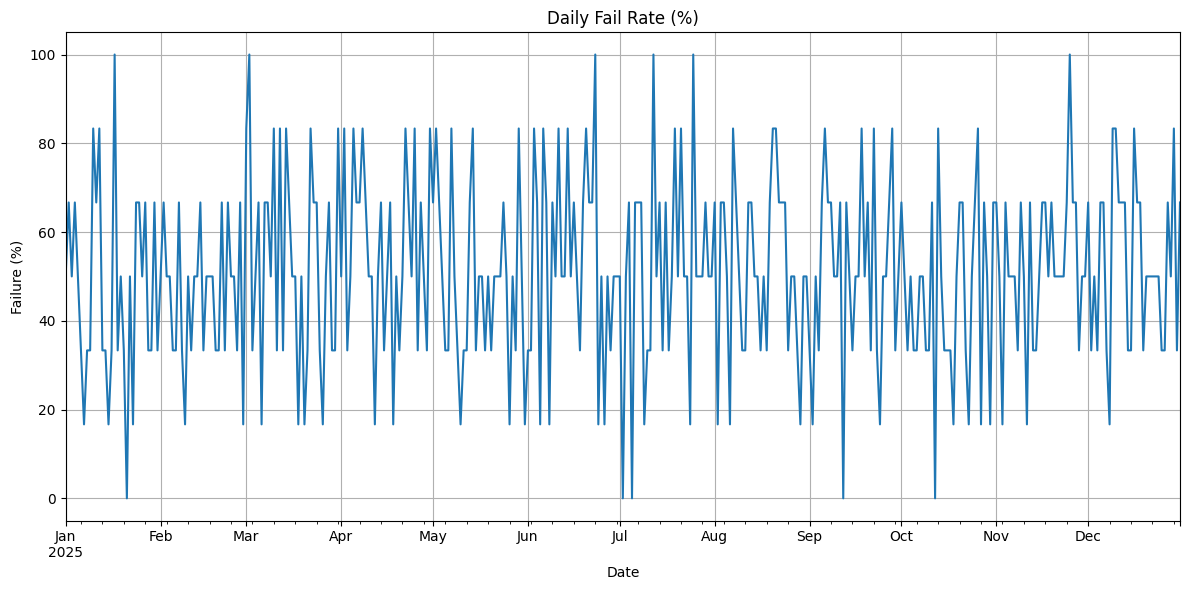

In [485]:
plt.figure(figsize=(12, 6))
daily_counts['Fail Rate (%)'].plot(title='Daily Fail Rate (%)', ylabel='Failure (%)', xlabel='Date')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Exercise 7: Detect Anomalies**

**Problem:** Identify rows where `Position Tolerance` exceeds 28 µm.

**Purpose:** Conditional filtering and anomaly detection.

In [486]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')
df.size

28470

In [487]:
mask = df['Position Tolerance (μm)'] > 28

In [488]:
df[mask].size

1924

In [489]:
df[mask][['Date', 'Position Tolerance (μm)']].head()

,Date,Position Tolerance (μm)
0,2025-01-01,28.11
14,2025-01-03,28.83
22,2025-01-04,28.11
32,2025-01-06,29.88
45,2025-01-08,29.44


<Figure size 1000x500 with 0 Axes>

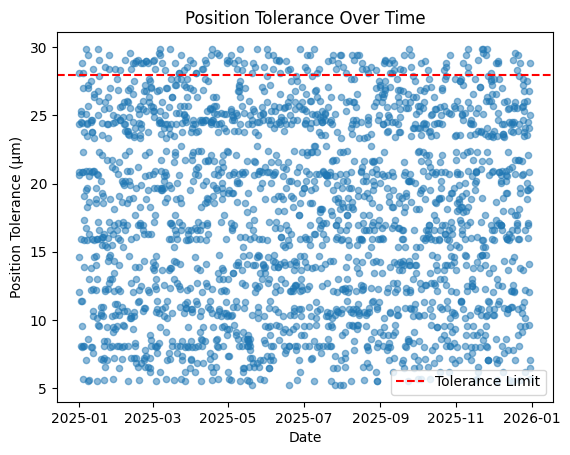

In [490]:
# Optional: Visualize anomalies
plt.figure(figsize=(10, 5))
df.plot.scatter(x='Date', y='Position Tolerance (μm)', alpha=0.5)
plt.axhline(y=28, color='red', linestyle='--', label='Tolerance Limit')
plt.title('Position Tolerance Over Time')
plt.legend()
plt.show()

### Interpretation

1. **Below the Line (Good)**

   * Any points **below 28 µm** are within acceptable limits.
   * These indicate **components that met tolerance** criteria.

2. **Above the Line (Anomalies)**

   * Points **above 28 µm** exceed the acceptable tolerance.
   * These are **potential quality issues** or **failures** flagged for review.

3. **Pattern Over Time**

   * Clusters of failures on certain days may indicate:

     * Machine misalignment
     * Tool wear
     * Calibration issues
   * Regular spikes suggest a recurring problem tied to shift or machine.

4. **Spread/Variability**

   * **Tight clustering** around the tolerance line suggests stable process control.
   * **Wider spread** = more process variability → a potential need for investigation.



### Example Insights

| Observation                    | Interpretation                                |
| ------------------------------ | --------------------------------------------- |
| Many dots just above 28 µm     | Close calls — process drifting toward failure |
| Sudden rise on a specific date | Machine/setup problem on that day             |
| Gradual increase over time     | Tool degradation or calibration drift         |


### **Exercise 8: Most Common Machine**

**Problem:** Identify the machine with the highest usage.

**Purpose:** Count and frequency analysis.

In [491]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')

In [492]:
df.head(3)

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail
0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.00,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.30,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail


In [493]:
machine_ids = df['Machine ID'].value_counts()

In [494]:
machine_ids

Machine ID
CMM B    813
CMM A    698
CMM C    679
Name: count, dtype: int64

In [495]:
machine_ids.max()

np.int64(813)

In [496]:
machine_ids.idxmax()

'CMM B'

### **Exercise 9: Save Filtered JSON**

**Problem:** Filter data for `Shift 2` and save to a new JSON file.
    
**Purpose:** File handling using `to_json()`.

In [497]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')

In [498]:
df.head(3)

,Date,Shift,Machine ID,Component Type,Batch ID,Flatness (μm),Circularity (μm),Cylindricity (μm),Straightness (μm),Perpendicularity (μm),Parallelism (μm),Position Tolerance (μm),Pass/Fail
0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.00,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.30,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail


In [499]:
mask = df['Shift'] == 'Shift 2'

In [500]:
shift_2 = df[mask]

In [501]:
shift_2.to_json('JSON/shift_2.json', orient='records')

### **Exercise 10: Pivot Table of Measurements**

**Problem:** Create a pivot table with `Date` as index, `Component Type` as columns, and average `Flatness`.

**Purpose:** Apply pivoting to analyze measurement distributions.

In [502]:
df = pd.read_json('JSON/cmm_measurement_365day_dataset.json')

In [503]:
df['Date'] = pd.to_datetime(df['Date'])

In [504]:
pivot = pd.pivot_table(
    df,
    index='Date',
    columns='Component Type',
    values='Flatness (μm)',
    aggfunc='mean'
)

In [505]:
pivot.head()

Component Type,Bracket,Bushing,Cover Plate,Cylinder,Disc,Shaft
Date,,,,,,
2025-01-01,NaN,NaN,3.030,9.15,NaN,7.260
2025-01-02,17.370,13.74,7.010,15.92,NaN,NaN
2025-01-03,NaN,NaN,7.570,8.45,17.42,6.240
2025-01-04,NaN,NaN,15.505,9.42,NaN,6.410
2025-01-05,14.525,NaN,10.940,NaN,16.14,11.645


## Section B: XML Data Handling

### **Exercise 11: Load XML and Compare**

**Problem:** Parse the XML file and compare its structure with the JSON.

**Purpose:** Practice reading XML using `ElementTree` or `lxml`.

In [506]:
import xml.etree.ElementTree as ET

In [507]:
tree = ET.parse('XML/cmm_measurement_365day_dataset.xml')

In [508]:
root = tree.getroot()

In [509]:
for i, measurement in enumerate(root.findall('Measurement')):
    for child in measurement:
        print(child.tag, ':', child.text)
    break

index : 0
Date : 2025-01-01
Shift : Shift 1
Machine_ID : CMM B
Component_Type : Cylinder
Batch_ID : CMM6728
Flatness__μm_ : 10.0
Circularity__μm_ : 11.35
Cylindricity__μm_ : 3.05
Straightness__μm_ : 7.35
Perpendicularity__μm_ : 20.43
Parallelism__μm_ : 14.25
Position_Tolerance__μm_ : 28.11
Pass_Fail : Fail


### Comparison: XML vs JSON

| Feature            | JSON                              | XML                                |
| ------------------ | --------------------------------- | ---------------------------------- |
| Format             | Key-value pairs (dictionary-like) | Tag-based hierarchical structure   |
| File Root          | A list or dictionary              | `<Measurements>` tag with children |
| Entry Structure    | Each item is a flat dict          | Each `<Measurement>` is a node     |
| Parsing Method     | `pd.read_json()` or `json.load()` | `ElementTree` or `lxml.etree`      |
| Pandas Integration | Easy and direct                   | Needs conversion from XML elements |


In [510]:
# Optional: Convert XML to DataFrame
data = []
for measurement in root.findall('Measurement'):
    entry = {child.tag: child.text for child in measurement}
    data.append(entry)

In [511]:
df_xml = pd.DataFrame(data)

In [512]:
df_xml.head()

,index,Date,Shift,Machine_ID,Component_Type,Batch_ID,Flatness__μm_,Circularity__μm_,Cylindricity__μm_,Straightness__μm_,Perpendicularity__μm_,Parallelism__μm_,Position_Tolerance__μm_,Pass_Fail
0,0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.0,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.3,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail
3,3,2025-01-01,Shift 2,CMM A,Shaft,CMM9522,2.56,4.17,21.14,6.36,9.22,12.48,20.86,Pass
4,4,2025-01-01,Shift 2,CMM A,Shaft,CMM7033,4.1,3.86,16.5,1.77,21.66,4.24,12.04,Pass


### **Exercise 12: XML to DataFrame**

**Problem:** Convert the `<Measurement>` tags to a pandas DataFrame.

**Purpose:** Learn to extract values from XML nodes into a usable structure.

In [513]:
tree = ET.parse('XML/cmm_measurement_365day_dataset.xml')

In [514]:
root = tree.getroot()

In [515]:
data = []
for measurement in root.findall('Measurement'):
    entry = {child.tag: child.text for child in measurement}
    data.append(entry)

In [516]:
df_xml = pd.DataFrame(data)

In [517]:
df_xml.head()

,index,Date,Shift,Machine_ID,Component_Type,Batch_ID,Flatness__μm_,Circularity__μm_,Cylindricity__μm_,Straightness__μm_,Perpendicularity__μm_,Parallelism__μm_,Position_Tolerance__μm_,Pass_Fail
0,0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.0,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.3,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail
3,3,2025-01-01,Shift 2,CMM A,Shaft,CMM9522,2.56,4.17,21.14,6.36,9.22,12.48,20.86,Pass
4,4,2025-01-01,Shift 2,CMM A,Shaft,CMM7033,4.1,3.86,16.5,1.77,21.66,4.24,12.04,Pass


### **Exercise 13: Measurement Distribution**

**Problem:** Plot histogram for `Flatness`, `Cylindricity`, and `Position Tolerance`.
    
**Purpose:** Visual analysis of measurements.

In [518]:
cols_to_float = ['Flatness__μm_', 'Cylindricity__μm_', 'Position_Tolerance__μm_']

In [519]:
df_xml = df_xml[cols_to_float].astype(float)

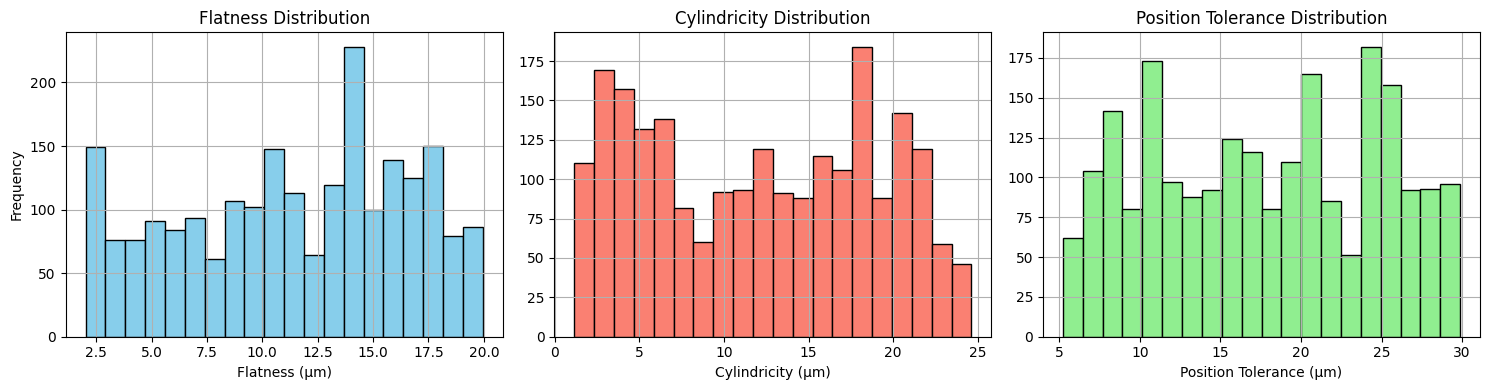

In [520]:
plt.figure(figsize=(15, 4))

# Flatness
plt.subplot(1, 3, 1)
df_xml['Flatness__μm_'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Flatness Distribution')
plt.xlabel('Flatness (μm)')
plt.ylabel('Frequency')

# Cylindricity
plt.subplot(1, 3, 2)
df_xml['Cylindricity__μm_'].hist(bins=20, color='salmon', edgecolor='black')
plt.title('Cylindricity Distribution')
plt.xlabel('Cylindricity (μm)')

# Position Tolerance
plt.subplot(1, 3, 3)
df_xml['Position_Tolerance__μm_'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Position Tolerance Distribution')
plt.xlabel('Position Tolerance (μm)')

plt.tight_layout()
plt.show()


### Interpretation Tips
- Bell-shaped curve? Suggests normally distributed process.

- Skewed? Could indicate measurement bias or machine/tool issues.

- Long tails or multiple peaks? May indicate variation between shifts, setups, or component types.

### **Exercise 14: Max/Min by Component Type**

**Problem:** Find max and min `Cylindricity` for each `Component Type`.
    
**Purpose:** Aggregation and comparison.


In [521]:
df_xml['Cylindricity__μm_'] = df['Cylindricity (μm)'].astype(float)

In [522]:
summary = df.groupby('Component Type')['Cylindricity (μm)'].agg(['max', 'min'])

In [523]:
summary.columns = ['Max Cylindricity (μm)', 'Min Cylindricity (μm)']

In [524]:
summary.head()

,Max Cylindricity (μm),Min Cylindricity (μm)
Component Type,,
Bracket,22.44,1.34
Bushing,22.68,2.01
Cover Plate,24.21,2.15
Cylinder,24.53,1.30
Disc,23.02,1.16


### **Exercise 15: Save to XML**

**Problem:** Take filtered data (e.g. only `Pass` results) and write to a new XML file.

**Purpose:** Practice creating new XML structures from pandas.


In [525]:
df_xml = pd.DataFrame(data)

In [526]:
df_xml.head()

,index,Date,Shift,Machine_ID,Component_Type,Batch_ID,Flatness__μm_,Circularity__μm_,Cylindricity__μm_,Straightness__μm_,Perpendicularity__μm_,Parallelism__μm_,Position_Tolerance__μm_,Pass_Fail
0,0,2025-01-01,Shift 1,CMM B,Cylinder,CMM6728,10.0,11.35,3.05,7.35,20.43,14.25,28.11,Fail
1,1,2025-01-01,Shift 1,CMM A,Cylinder,CMM8120,8.3,14.07,7.94,6.76,8.86,13.19,24.35,Fail
2,2,2025-01-01,Shift 1,CMM C,Shaft,CMM7901,15.12,12.18,22.88,1.07,6.08,11.21,20.66,Fail
3,3,2025-01-01,Shift 2,CMM A,Shaft,CMM9522,2.56,4.17,21.14,6.36,9.22,12.48,20.86,Pass
4,4,2025-01-01,Shift 2,CMM A,Shaft,CMM7033,4.1,3.86,16.5,1.77,21.66,4.24,12.04,Pass


In [527]:
mask = df_xml['Pass_Fail'] == 'Pass'

In [528]:
pass_xml_df = df_xml[mask]

In [529]:
pass_xml_df.head(3)

,index,Date,Shift,Machine_ID,Component_Type,Batch_ID,Flatness__μm_,Circularity__μm_,Cylindricity__μm_,Straightness__μm_,Perpendicularity__μm_,Parallelism__μm_,Position_Tolerance__μm_,Pass_Fail
3,3,2025-01-01,Shift 2,CMM A,Shaft,CMM9522,2.56,4.17,21.14,6.36,9.22,12.48,20.86,Pass
4,4,2025-01-01,Shift 2,CMM A,Shaft,CMM7033,4.1,3.86,16.5,1.77,21.66,4.24,12.04,Pass
5,5,2025-01-01,Shift 2,CMM C,Cover Plate,CMM1401,3.03,14.51,6.01,4.83,7.3,11.61,14.58,Pass


In [530]:
pass_xml_df.to_xml('XML/pass.xml', encoding='utf-8')

## Section C: HTML and Web Scraping

### **Exercise 16: Read Table from HTML**

**Problem:** Use `pd.read_html()` to extract a table from a manufacturing or metrology standards webpage.

**Purpose:** Learn how to import structured data from the web.


In [531]:
url = 'https://grprototypes.com/gdt-symbols-explained-from-basic-drawings-to-expert-applications/'

In [532]:
tables = pd.read_html(url)

In [533]:
len(tables)

5

In [534]:
gd_t_table = tables[0]

In [535]:
gd_t_table.head()

,Category,Purpose,Key Symbols
0,Form Controls,Specify feature shapes,"Straightness, Flatness, Circularity, Cylindricity"
1,Profile Controls,Define 3D tolerance zones,"Line Profile, Surface Profile"
2,Orientation Controls,Control angular relationships,"Perpendicularity, Angularity, Parallelism"
3,Location Controls,Define linear dimensions,"Position, Concentricity, Symmetry"
4,Runout Controls,Specify rotational variation,"Circular Runout, Total Runout"


In [536]:
# Save for future use
gd_t_table.to_csv('gd_t_table.csv', index=False)

### **Exercise 17: Scrape Component Specs**

**Problem:** Use `requests` and `BeautifulSoup` to scrape dimension tolerances for shafts or brackets.
    
**Purpose:** Build a reference table for tolerances.

In [537]:
url = 'https://roymech.org/Useful_Tables/ISO_Tolerances.html'

In [538]:
response = requests.get(url)

In [539]:
soup = BeautifulSoup(response.content, 'html.parser')

In [540]:
tables = soup.find_all('table')

In [541]:
len(tables)

4

In [542]:
html_str = str(tables[2])

In [543]:
df_tol = pd.read_html(StringIO(html_str), header=0)[0]

In [544]:
df_tol.head()

,Description,Hole,Shaft
0,Loose Running,H11,c11
1,Free Running,H9,d9
2,Loose Running,H11,c11
3,Easy Running - Good quality easy to do-,H8,f8
4,Sliding,H7,g6


### **Exercise 18: Match Specs to Data**

**Problem:** Compare scraped standard tolerances with actual values from the dataset.

**Purpose:** Integrate scraped external data for QC comparison.


In [545]:
url = 'https://roymech.org/Useful_Tables/ISO_Tolerances/ISO_286_2s.html'

In [546]:
response = requests.get(url)

In [547]:
soup = BeautifulSoup(response.content, 'html.parser')

In [548]:
tables = soup.find_all('table')

In [549]:
len(tables)

1

In [550]:
# Assume measurement data
df_cmm = pd.DataFrame(
    {
        'Nominal_Diameter': [20, 35, 50],
        'Measured_Diameter': [20.015, 35.025, 50.030],
        'Tolerance_Class': ['h6', 'h7', 'h8']
    }
)

In [551]:
df_tolerance = pd.read_html(StringIO(str(tables[0])), header=0)[0]

In [552]:
df_tolerance.head()

,Unnamed: 0,Nominal Shaft Sizes (mm),Nominal Shaft Sizes (mm).1,Nominal Shaft Sizes (mm).2,Nominal Shaft Sizes (mm).3,Nominal Shaft Sizes (mm).4,Nominal Shaft Sizes (mm).5,Nominal Shaft Sizes (mm).6,Nominal Shaft Sizes (mm).7,Nominal Shaft Sizes (mm).8,...,Nominal Shaft Sizes (mm).10,Nominal Shaft Sizes (mm).11,Nominal Shaft Sizes (mm).12,Nominal Shaft Sizes (mm).13,Nominal Shaft Sizes (mm).14,Nominal Shaft Sizes (mm).15,Nominal Shaft Sizes (mm).16,Nominal Shaft Sizes (mm).17,Nominal Shaft Sizes (mm).18,Nominal Shaft Sizes (mm).19
0,over,3,6,10,18,30,40,50,65,80,...,120,140,160,180,200,225,250,280,315,355
1,inc.,6,10,18,30,40,50,65,80,100,...,140,160,180,200,225,250,280,315,355,400
2,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,...,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres
3,Grade,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,...,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign
4,a12,-270 -390,-280 -430,-290 -470,-300 -510,-310 -560,-320 -570,-340 -640,-360 -660,-380 -730,...,-460 -860,-520 -920,-580 -980,-660 -1120,-740 -1200,-820 -1280,-920 -1440,-1050 -1570,-1200 -1770,-1350 -1920


In [553]:
df_tolerance.rename(columns={'Unnamed: 0': 'Tolerance_Class'}, inplace=True)

In [554]:
df_tolerance.head()

,Tolerance_Class,Nominal Shaft Sizes (mm),Nominal Shaft Sizes (mm).1,Nominal Shaft Sizes (mm).2,Nominal Shaft Sizes (mm).3,Nominal Shaft Sizes (mm).4,Nominal Shaft Sizes (mm).5,Nominal Shaft Sizes (mm).6,Nominal Shaft Sizes (mm).7,Nominal Shaft Sizes (mm).8,...,Nominal Shaft Sizes (mm).10,Nominal Shaft Sizes (mm).11,Nominal Shaft Sizes (mm).12,Nominal Shaft Sizes (mm).13,Nominal Shaft Sizes (mm).14,Nominal Shaft Sizes (mm).15,Nominal Shaft Sizes (mm).16,Nominal Shaft Sizes (mm).17,Nominal Shaft Sizes (mm).18,Nominal Shaft Sizes (mm).19
0,over,3,6,10,18,30,40,50,65,80,...,120,140,160,180,200,225,250,280,315,355
1,inc.,6,10,18,30,40,50,65,80,100,...,140,160,180,200,225,250,280,315,355,400
2,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,...,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres,micrometres
3,Grade,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,...,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign,All limits below with + sign
4,a12,-270 -390,-280 -430,-290 -470,-300 -510,-310 -560,-320 -570,-340 -640,-360 -660,-380 -730,...,-460 -860,-520 -920,-580 -980,-660 -1120,-740 -1200,-820 -1280,-920 -1440,-1050 -1570,-1200 -1770,-1350 -1920


In [555]:
df_filtered = df_tolerance[['Tolerance_Class', 'Nominal Shaft Sizes (mm).2']]

In [556]:
df_filtered.columns = ['Tolerance_Class', 'Limits']

In [557]:
# Drop non-data rows
df_filtered = df_filtered[~df_filtered['Tolerance_Class'].isin(['Grade', 'micrometres', 'All limits below with + sign'])]

In [558]:
df_filtered = df_filtered.dropna()

In [559]:
# Extract lower and upper deviation
df_filtered[['Dev1', 'Dev2']] = df_filtered['Limits'].str.extract(r'(-?\d+)\s+(-?\d+)').astype(float)

In [560]:
df_filtered['Upper_Deviation'] = df_filtered[['Dev1', 'Dev2']].max(axis=1)

In [561]:
df_filtered['Lower_Deviation'] = df_filtered[['Dev1', 'Dev2']].min(axis=1)

In [562]:
df_filtered.head()

,Tolerance_Class,Limits,Dev1,Dev2,Upper_Deviation,Lower_Deviation
0,over,10,NaN,NaN,NaN,NaN
1,inc.,18,NaN,NaN,NaN,NaN
4,a12,-290 -470,-290.0,-470.0,-290.0,-470.0
5,d6,-50 -61,-50.0,-61.0,-50.0,-61.0
6,e6,-32 -43,-32.0,-43.0,-32.0,-43.0


In [563]:
df_merged = df_cmm.merge(df_filtered, how='left', on='Tolerance_Class')

In [564]:
df_merged['Upper_Limit'] = df_merged['Nominal_Diameter'] + df_merged['Upper_Deviation']/1000

In [568]:
df_merged['Lower_Limit'] = df_merged['Nominal_Diameter'] + df_merged['Lower_Deviation']/1000

In [569]:
df_merged['Result'] = df_merged.apply(
    lambda row: 'PASS' if row['Lower_Limit'] <= row['Measured_Diameter'] <= row['Upper_Limit'] else 'FAIL',
    axis=1
)

In [570]:
df_merged[['Nominal_Diameter', 'Measured_Diameter', 'Tolerance_Class', 'Lower_Limit', 'Upper_Limit', 'Result']]

,Nominal_Diameter,Measured_Diameter,Tolerance_Class,Lower_Limit,Upper_Limit,Result
0,20,20.015,h6,19.989,20.0,FAIL
1,35,35.025,h7,34.982,35.0,FAIL
2,50,50.030,h8,49.973,50.0,FAIL


### **Exercise 19: Identify Spec Violations**

**Problem:** Flag measurements that do not meet scraped industry tolerances.

**Purpose:** Practice logic-driven cross-validation.

In [571]:
violations = df_merged[df_merged['Result'] == 'FAIL']

In [574]:
violations[['Nominal_Diameter', 'Measured_Diameter', 'Tolerance_Class', 'Lower_Limit', 'Upper_Limit', 'Result']]

,Nominal_Diameter,Measured_Diameter,Tolerance_Class,Lower_Limit,Upper_Limit,Result
0,20,20.015,h6,19.989,20.0,FAIL
1,35,35.025,h7,34.982,35.0,FAIL
2,50,50.030,h8,49.973,50.0,FAIL


### **Exercise 20: Save Scraped Data**

**Problem:** Save the scraped standards into an HTML or CSV file.

**Purpose:** Practice file export of web-scraped content.

In [575]:
df_tolerance.to_csv('df_tolerance.csv', index=False)